##Gathering Data

Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #Menghubungkan Google Colab dengan Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# #menyimpan lokasi atau jalur folder
# path = "/content/gdrive/MyDrive/dataset_sahrul/"

In [4]:
# Mengimpor data dari CSV
df = pd.read_csv('RetailOrders.csv')
df

,Order ID,Customer Name,?,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
0,OD1,Harish,Pria,NaN,NaN,Vellore,11-08-2017,North,1254.0,0.12,401.28,NaN
1,OD2,NaN,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,NaN,149.80,Tamil Nadu
2,OD3,Hussain,M,NaN,Atta & Flour,Perambalur,06-12-2017,NaN,2360.0,0.21,165.20,Tamil Nadu
3,OD4,NaN,Pria,Fruits & Veggies,Fresh Vegetables,Dharmapuri,NaN,South,896.0,0.25,89.60,NaN
4,OD5,Ridhesh,NaN,NaN,Organic Staples,Ooty,10-11-2016,South,2355.0,0.26,NaN,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,Male,NaN,Eggs,Madurai,NaN,West,945.0,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Male,Bakery,NaN,Kanyakumari,07-12-2015,West,1195.0,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Male,NaN,Rice,Bodi,06-06-2017,NaN,1567.0,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Male,Oil & Masala,Spices,Pudukottai,10/16/2018,NaN,1659.0,0.15,597.24,Tamil Nadu


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9969 non-null   object 
 2   ?              9743 non-null   object 
 3   Category       9929 non-null   object 
 4   Sub Category   9939 non-null   object 
 5   City           9813 non-null   object 
 6   Order Date     9983 non-null   object 
 7   Region         9988 non-null   object 
 8   Sales          9894 non-null   float64
 9   Discount       9916 non-null   float64
 10  Profit($)      9981 non-null   float64
 11  State          9992 non-null   object 
dtypes: float64(3), object(9)
memory usage: 937.1+ KB


##Assessing data


Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

##Cleaning data


Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data. Seluruh teknik tersebut akan kita pelajari pada beberapa materi ke depan.

In [6]:
df.isna().sum()

Order ID           0
Customer Name     25
?                251
Category          65
Sub Category      55
City             181
Order Date        11
Region             6
Sales            100
Discount          78
Profit($)         13
State              2
dtype: int64

In [7]:
# Mengganti nama kolom 'gender' menjadi 'Gender'
df.rename(columns={'?': 'Gender'}, inplace=True)

In [8]:
# Mengganti nilai NaN pada kolom 'Customer Name' dengan 'Customer Unknown - [Order ID]'
df['Customer Name'] = df.apply(lambda row: f"Customer - {row['Order ID']}" if pd.isna(row['Customer Name']) else row['Customer Name'], axis=1)

In [9]:
df

,Order ID,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
0,OD1,Harish,Pria,NaN,NaN,Vellore,11-08-2017,North,1254.0,0.12,401.28,NaN
1,OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,NaN,149.80,Tamil Nadu
2,OD3,Hussain,M,NaN,Atta & Flour,Perambalur,06-12-2017,NaN,2360.0,0.21,165.20,Tamil Nadu
3,OD4,Customer - OD4,Pria,Fruits & Veggies,Fresh Vegetables,Dharmapuri,NaN,South,896.0,0.25,89.60,NaN
4,OD5,Ridhesh,NaN,NaN,Organic Staples,Ooty,10-11-2016,South,2355.0,0.26,NaN,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,Male,NaN,Eggs,Madurai,NaN,West,945.0,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Male,Bakery,NaN,Kanyakumari,07-12-2015,West,1195.0,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Male,NaN,Rice,Bodi,06-06-2017,NaN,1567.0,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Male,Oil & Masala,Spices,Pudukottai,10/16/2018,NaN,1659.0,0.15,597.24,Tamil Nadu


In [10]:
df.head()

,Order ID,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
0,OD1,Harish,Pria,NaN,NaN,Vellore,11-08-2017,North,1254.0,0.12,401.28,NaN
1,OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,NaN,149.80,Tamil Nadu
2,OD3,Hussain,M,NaN,Atta & Flour,Perambalur,06-12-2017,NaN,2360.0,0.21,165.20,Tamil Nadu
3,OD4,Customer - OD4,Pria,Fruits & Veggies,Fresh Vegetables,Dharmapuri,NaN,South,896.0,0.25,89.60,NaN
4,OD5,Ridhesh,NaN,NaN,Organic Staples,Ooty,10-11-2016,South,2355.0,0.26,NaN,Tamil Nadu


In [11]:
df['State'].isna().sum()

2

In [12]:
#Menghapus baris yang memiliki NaN di kolom State
df = df.dropna(subset=['State'])

In [13]:
# Menampilkan nilai unik di kolom 'gender'
unique_genders = df['Gender'].unique()
print(unique_genders)

['Female' 'M' nan 'Pria' 'Male' 'Perempuan' 'Wanita' 'F' 'Laki']


In [14]:
# Menangani variasi dalam kolom 'Gender'
df['Gender'] = df['Gender'].replace({
    'Pria': 'Male',
    'Laki': 'Male',
    'M': 'Male',
    'Female': 'Female',
    'Perempuan': 'Female',
    'Wanita': 'Female',
    'F': 'Female',
    # Menangani nilai NaN, bisa diubah ke 'Unknown' jika perlu
    np.nan: 'prefer not to say'
})

# Menampilkan nilai unik setelah penyesuaian
unique_genders = df['Gender'].unique()
print(unique_genders)


['Female' 'Male' 'prefer not to say']


C:\Users\ACER\AppData\Local\Temp\ipykernel_24656\694035343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({


In [15]:
# Menampilkan nilai unik di kolom 'gender'
unique_genders = df['Category'].unique()
print(unique_genders)

['Beverages' nan 'Food Grains' 'Fruits & Veggies' 'Bakery' 'Snacks'
 'Eggs, Meat & Fish' 'Oil & Masala']


In [16]:
# Menampilkan nilai unik di kolom 'gender'
unique_genders = df['Sub Category'].unique()
print(unique_genders)

['Health Drinks' 'Atta & Flour' 'Organic Staples' nan 'Fresh Fruits'
 'Biscuits' 'Cakes' 'Chocolates' 'Eggs' 'Cookies' 'Fresh Vegetables'
 'Chicken' 'Edible Oil & Ghee' 'Mutton' 'Soft Drinks' 'Dals & Pulses'
 'Organic Vegetables' 'Masalas' 'Noodles' 'Organic Fruits' 'Fish' 'Spices'
 'Rice' 'Breads & Buns']


In [17]:
# Membuat mapping untuk kategori berdasarkan sub kategori
category_mapping = {
    'Eggs': 'Eggs, Meat & Fish',
    'Biscuits': 'Bakery',
    'Cakes': 'Bakery',
    'Chocolates': 'Bakery',
    'Cookies': 'Bakery',
    'Chicken': 'Eggs, Meat & Fish',
    'Soft Drinks': 'Beverages',
    'Health Drinks': 'Beverages',
    'Atta & Flour': 'Food Grains',
    'Fresh Vegetables': 'Fruits & Veggies',
    'Organic Staples': 'Food Grains',
    'Fresh Fruits': 'Fruits & Veggies',
    'Edible Oil & Ghee': 'Oil & Masala',
    'Mutton': 'Eggs, Meat & Fish',
    'Dals & Pulses': 'Food Grains',
    'Organic Vegetables': 'Fruits & Veggies',
    'Masalas': 'Oil & Masala',
    'Noodles': 'Food Grains',
    'Organic Fruits': 'Fruits & Veggies',
    'Fish': 'Eggs, Meat & Fish',
    'Spices': 'Oil & Masala',
    'Rice': 'Food Grains',
    'Breads & Buns': 'Bakery',
    'Snacks' : 'Snacks'
}

# 1. Mengganti NaN pada kolom 'Category' berdasarkan 'Sub Category'
df['Category'] = df.apply(
    lambda row: category_mapping.get(row['Sub Category'], row['Category']) if pd.isna(row['Category']) else row['Category'], axis=1
)

# 2. Mengganti NaN pada kolom 'Sub Category' berdasarkan 'Category'
reverse_category_mapping = {v: k for k, v in category_mapping.items()}
df['Sub Category'] = df.apply(
    lambda row: reverse_category_mapping.get(row['Category'], row['Sub Category']) if pd.isna(row['Sub Category']) else row['Sub Category'], axis=1
)

# Menampilkan hasil
print(df[['Category', 'Sub Category']].head())

           Category     Sub Category
1         Beverages    Health Drinks
2       Food Grains     Atta & Flour
4       Food Grains  Organic Staples
5       Food Grains             Rice
6  Fruits & Veggies   Organic Fruits


C:\Users\ACER\AppData\Local\Temp\ipykernel_24656\3244426291.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df.apply(
C:\Users\ACER\AppData\Local\Temp\ipykernel_24656\3244426291.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sub Category'] = df.apply(


In [18]:
# Menghapus baris yang memiliki NaN di kedua kolom 'Category' dan 'Sub Category'
df.dropna(subset=['Category', 'Sub Category'], how='all', inplace=True)

# Menampilkan hasil setelah baris dengan NaN di kedua kolom dihapus
print(df[['Category', 'Sub Category']].head())

           Category     Sub Category
1         Beverages    Health Drinks
2       Food Grains     Atta & Flour
4       Food Grains  Organic Staples
5       Food Grains             Rice
6  Fruits & Veggies   Organic Fruits


C:\Users\ACER\AppData\Local\Temp\ipykernel_24656\1872328453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Category', 'Sub Category'], how='all', inplace=True)


In [19]:
# Menghitung jumlah NaN di kolom 'Category'
nan_category = df['Category'].isna().sum()

# Menghitung jumlah NaN di kolom 'Sub Category'
nan_sub_category = df['Sub Category'].isna().sum()

# Menampilkan hasilnya
print(f"Jumlah NaN di 'Category': {nan_category}")
print(f"Jumlah NaN di 'Sub Category': {nan_sub_category}")

Jumlah NaN di 'Category': 0
Jumlah NaN di 'Sub Category': 0


In [20]:
df.head()

,Order ID,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
1,OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,NaN,149.80,Tamil Nadu
2,OD3,Hussain,Male,Food Grains,Atta & Flour,Perambalur,06-12-2017,NaN,2360.0,0.21,165.20,Tamil Nadu
4,OD5,Ridhesh,prefer not to say,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.26,NaN,Tamil Nadu
5,OD6,Adavan,Male,Food Grains,Rice,Dharmapuri,06-09-2015,West,2305.0,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Male,Fruits & Veggies,Organic Fruits,Trichy,NaN,West,826.0,0.33,346.92,Tamil Nadu


In [21]:
df.tail()

,Order ID,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
9989,OD9990,Sudeep,Male,"Eggs, Meat & Fish",Eggs,Madurai,NaN,West,945.0,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Male,Bakery,Breads & Buns,Kanyakumari,07-12-2015,West,1195.0,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Male,Food Grains,Rice,Bodi,06-06-2017,NaN,1567.0,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Male,Oil & Masala,Spices,Pudukottai,10/16/2018,NaN,1659.0,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Male,Food Grains,Atta & Flour,Tirunelveli,NaN,West,1034.0,0.28,165.44,Tamil Nadu


In [22]:
# Menampilkan nilai unik di kolom 'gender'
unique_genders = df['City'].unique()
print(unique_genders)

['Krishnagiri' 'Perambalur' 'Ooty' 'Dharmapuri' 'Trichy' 'Ramanadhapuram'
 'Tirunelveli' 'Chennai' 'Karur' 'Namakkal' 'Dindigul' 'Kanyakumari'
 'Bodi' 'Tenkasi' 'Vellore' 'Viluppuram' 'Madurai' 'Salem' 'Cumbum'
 'Nagercoil' 'Pudukottai' 'Theni' 'Coimbatore' 'Virudhunagar' nan]


In [23]:
# Menghitung jumlah NaN di kolom 'City'
nan_city = df['City'].isna().sum()
print(f"Jumlah NaN di 'City': {nan_city}")

Jumlah NaN di 'City': 181


In [24]:
# Mengganti NaN pada kolom 'City' dengan 'Unknown'
df['City'] = df['City'].fillna('Unknown')


C:\Users\ACER\AppData\Local\Temp\ipykernel_24656\3324217415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].fillna('Unknown')


In [25]:
# Menghapus baris yang memiliki NaN pada kolom 'Order Date'
df = df.dropna(subset=['Order Date'])

In [26]:
# Menghapus baris yang memiliki NaN pada kolom 'Region'
df = df.dropna(subset=['Region'])

In [27]:
# Menampilkan statistik deskriptif untuk kolom 'Sales', 'Discount', dan 'Profit($)'
stats = df[['Sales', 'Discount', 'Profit($)']].describe()
print(stats)

             Sales     Discount    Profit($)
count  9875.000000  9897.000000  9962.000000
mean   1497.568506     0.226852   374.933081
std     577.367157     0.074623   239.932212
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.195000
50%    1500.000000     0.230000   320.780000
75%    1995.000000     0.290000   525.802500
max    2500.000000     0.350000  1120.950000


In [28]:
# Mengisi NaN dengan nilai rata-rata pada masing-masing kolom
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
df['Profit($)'] = df['Profit($)'].fillna(df['Profit($)'].mean())

In [29]:
df.head()

,Order ID,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
1,OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.226852,149.800000,Tamil Nadu
4,OD5,Ridhesh,prefer not to say,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.260000,374.933081,Tamil Nadu
5,OD6,Adavan,Male,Food Grains,Rice,Dharmapuri,06-09-2015,West,2305.0,0.260000,322.700000,Tamil Nadu
8,OD9,Customer - OD9,Male,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791.0,0.230000,181.930000,Tamil Nadu
10,OD11,Ganesh,Male,Snacks,Chocolates,Karur,06-09-2015,West,1903.0,0.130000,437.690000,Tamil Nadu


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9975 entries, 1 to 9990
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9975 non-null   object 
 1   Customer Name  9975 non-null   object 
 2   Gender         9975 non-null   object 
 3   Category       9975 non-null   object 
 4   Sub Category   9975 non-null   object 
 5   City           9975 non-null   object 
 6   Order Date     9975 non-null   object 
 7   Region         9975 non-null   object 
 8   Sales          9975 non-null   float64
 9   Discount       9975 non-null   float64
 10  Profit($)      9975 non-null   float64
 11  State          9975 non-null   object 
dtypes: float64(3), object(9)
memory usage: 1013.1+ KB


In [31]:
#Missing value
missing_value= df.isnull().sum()
missing_value

Order ID         0
Customer Name    0
Gender           0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit($)        0
State            0
dtype: int64

In [32]:
#menghitung ratio missing value pada kolom cabin
rasio = missing_value.div(len(df))
rasio

Order ID         0.0
Customer Name    0.0
Gender           0.0
Category         0.0
Sub Category     0.0
City             0.0
Order Date       0.0
Region           0.0
Sales            0.0
Discount         0.0
Profit($)        0.0
State            0.0
dtype: float64

In [33]:
# Menjadikan 'Order ID' sebagai indeks
df.set_index('Order ID', inplace=True)

# Mengecek DataFrame setelah perubahan
df.head()


,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
Order ID,,,,,,,,,,,
OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.226852,149.800000,Tamil Nadu
OD5,Ridhesh,prefer not to say,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.260000,374.933081,Tamil Nadu
OD6,Adavan,Male,Food Grains,Rice,Dharmapuri,06-09-2015,West,2305.0,0.260000,322.700000,Tamil Nadu
OD9,Customer - OD9,Male,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791.0,0.230000,181.930000,Tamil Nadu
OD11,Ganesh,Male,Snacks,Chocolates,Karur,06-09-2015,West,1903.0,0.130000,437.690000,Tamil Nadu


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9975 entries, OD2 to OD9991
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9975 non-null   object 
 1   Gender         9975 non-null   object 
 2   Category       9975 non-null   object 
 3   Sub Category   9975 non-null   object 
 4   City           9975 non-null   object 
 5   Order Date     9975 non-null   object 
 6   Region         9975 non-null   object 
 7   Sales          9975 non-null   float64
 8   Discount       9975 non-null   float64
 9   Profit($)      9975 non-null   float64
 10  State          9975 non-null   object 
dtypes: float64(3), object(8)
memory usage: 935.2+ KB


In [35]:
df

,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
Order ID,,,,,,,,,,,
OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.226852,149.800000,Tamil Nadu
OD5,Ridhesh,prefer not to say,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.260000,374.933081,Tamil Nadu
OD6,Adavan,Male,Food Grains,Rice,Dharmapuri,06-09-2015,West,2305.0,0.260000,322.700000,Tamil Nadu
OD9,Customer - OD9,Male,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791.0,0.230000,181.930000,Tamil Nadu
OD11,Ganesh,Male,Snacks,Chocolates,Karur,06-09-2015,West,1903.0,0.130000,437.690000,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
OD9983,Veronica,Female,Fruits & Veggies,Organic Vegetables,Tenkasi,8/28/2018,West,1309.0,0.330000,183.260000,Tamil Nadu
OD9984,Peer,Female,Food Grains,Rice,Nagercoil,12-06-2017,West,2335.0,0.170000,607.100000,Tamil Nadu
OD9986,Shree,Female,"Eggs, Meat & Fish",Fish,Kanyakumari,11/13/2016,West,1286.0,0.300000,475.820000,Tamil Nadu


In [36]:
# Coba untuk mengonversi data dengan dua format tanggal yang berbeda
def convert_date(date):
    for fmt in ("%m/%d/%Y", "%d-%m-%Y"):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    return pd.NaT  # Jika format tidak cocok, kembalikan NaT

# Terapkan fungsi untuk mengonversi seluruh kolom
df['Order Date'] = df['Order Date'].apply(convert_date)

# Mengubah format menjadi DD-MM-YYYY
df['Order Date'] = df['Order Date'].dt.strftime('%d-%m-%Y')
df.tail()



,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
Order ID,,,,,,,,,,,
OD9983,Veronica,Female,Fruits & Veggies,Organic Vegetables,Tenkasi,28-08-2018,West,1309.0,0.33,183.26,Tamil Nadu
OD9984,Peer,Female,Food Grains,Rice,Nagercoil,12-06-2017,West,2335.0,0.17,607.10,Tamil Nadu
OD9986,Shree,Female,"Eggs, Meat & Fish",Fish,Kanyakumari,13-11-2016,West,1286.0,0.30,475.82,Tamil Nadu
OD9988,Customer - OD9988,Male,Fruits & Veggies,Organic Fruits,Theni,19-10-2015,West,1350.0,0.15,67.50,Tamil Nadu
OD9991,Alan,Male,Bakery,Breads & Buns,Kanyakumari,07-12-2015,West,1195.0,0.26,71.70,Tamil Nadu


In [37]:
df['Order Date'].isnull().sum()

0

In [38]:
print(df[df['Order Date'].isnull()])

Empty DataFrame
Columns: [Customer Name, Gender, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit($), State]
Index: []


In [39]:
df.head()

,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State
Order ID,,,,,,,,,,,
OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.226852,149.800000,Tamil Nadu
OD5,Ridhesh,prefer not to say,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.260000,374.933081,Tamil Nadu
OD6,Adavan,Male,Food Grains,Rice,Dharmapuri,06-09-2015,West,2305.0,0.260000,322.700000,Tamil Nadu
OD9,Customer - OD9,Male,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791.0,0.230000,181.930000,Tamil Nadu
OD11,Ganesh,Male,Snacks,Chocolates,Karur,06-09-2015,West,1903.0,0.130000,437.690000,Tamil Nadu


In [40]:
df.describe()

,Sales,Discount,Profit($)
count,9975.000000,9975.000000,9975.000000
mean,1497.568506,0.226852,374.933081
std,574.465505,0.074331,239.775799
min,500.000000,0.100000,25.250000
25%,1006.000000,0.160000,180.360000
50%,1497.568506,0.230000,321.020000
75%,1990.000000,0.290000,525.390000
max,2500.000000,0.350000,1120.950000


##EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9975 entries, OD2 to OD9991
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9975 non-null   object 
 1   Gender         9975 non-null   object 
 2   Category       9975 non-null   object 
 3   Sub Category   9975 non-null   object 
 4   City           9975 non-null   object 
 5   Order Date     9975 non-null   object 
 6   Region         9975 non-null   object 
 7   Sales          9975 non-null   float64
 8   Discount       9975 non-null   float64
 9   Profit($)      9975 non-null   float64
 10  State          9975 non-null   object 
dtypes: float64(3), object(8)
memory usage: 935.2+ KB


##1. Bagaimana performa profit dan penjualan di setiap kategori dan sub-kategori produk?

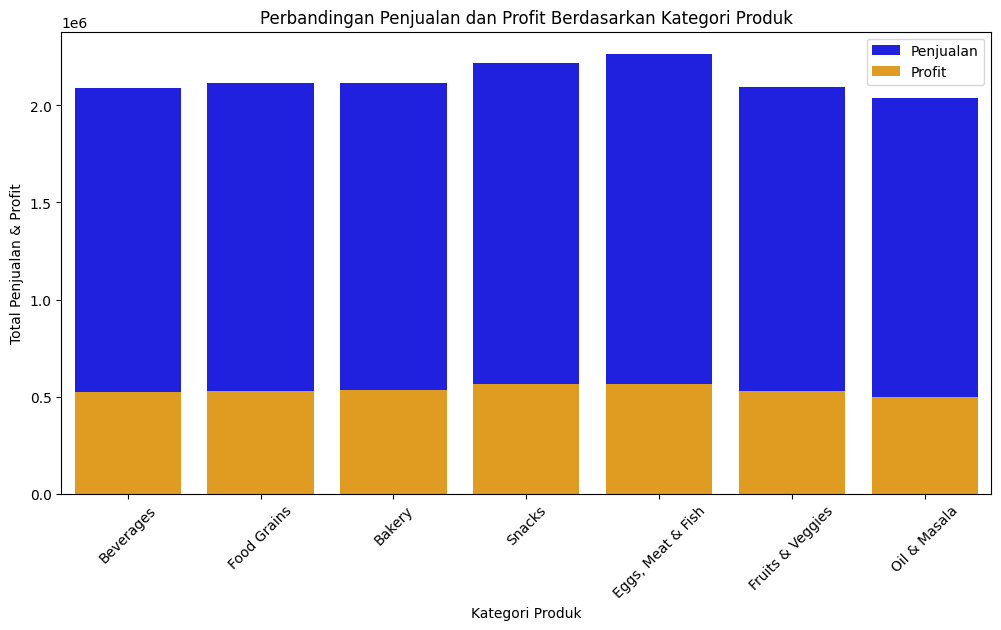

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi total Profit dan Sales berdasarkan Kategori Produk
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, errorbar=None, color='blue', label='Penjualan')
sns.barplot(x='Category', y='Profit($)', data=df, estimator=sum, errorbar=None, color='orange', label='Profit')
plt.title('Perbandingan Penjualan dan Profit Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan & Profit')
plt.legend()
plt.xticks(rotation=45)
plt.show()


##2. Bagaimana segmentasi pelanggan berdasarkan jenis kelamin dan kategori produk yang mereka beli?

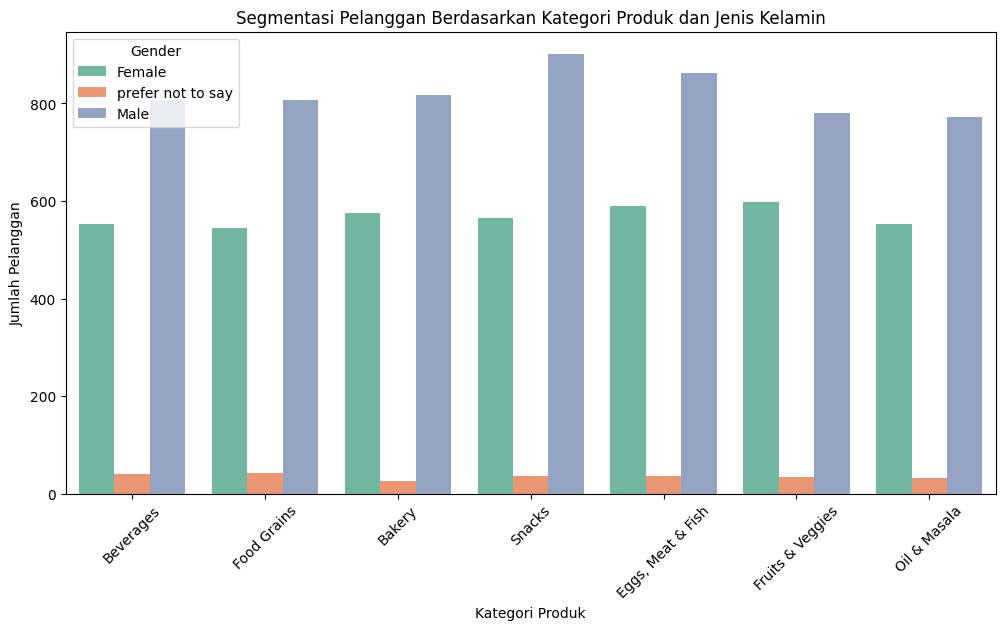

In [43]:
# Segmentasi pelanggan berdasarkan Gender dan Category
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Gender', data=df, palette='Set2')
plt.title('Segmentasi Pelanggan Berdasarkan Kategori Produk dan Jenis Kelamin')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()


##3. Apakah terdapat anomali dalam data penjualan?

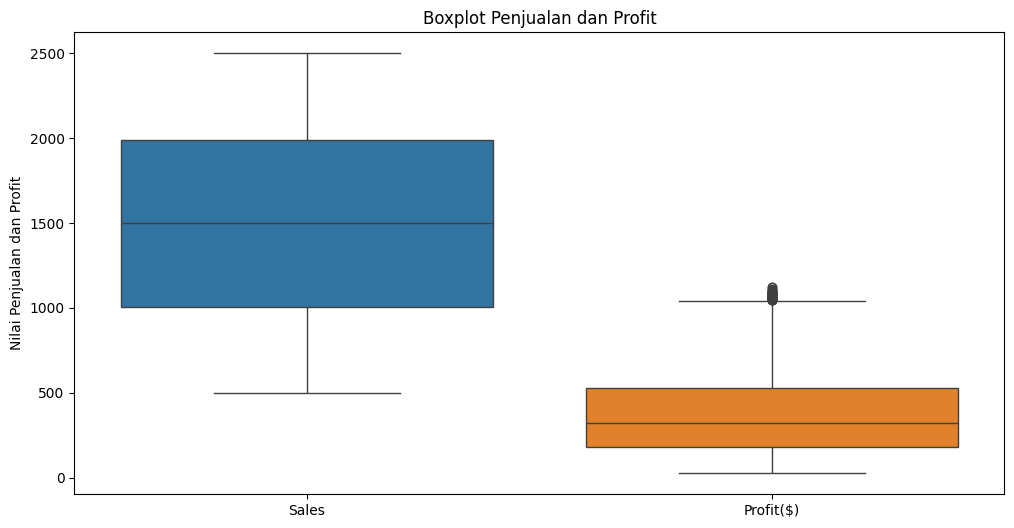

In [44]:
# Boxplot untuk mendeteksi outliers dalam Penjualan dan Profit
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Sales', 'Profit($)']])
plt.title('Boxplot Penjualan dan Profit')
plt.ylabel('Nilai Penjualan dan Profit')
plt.show()

##4. Apa hubungan antara diskon dan profit atau penjualan?

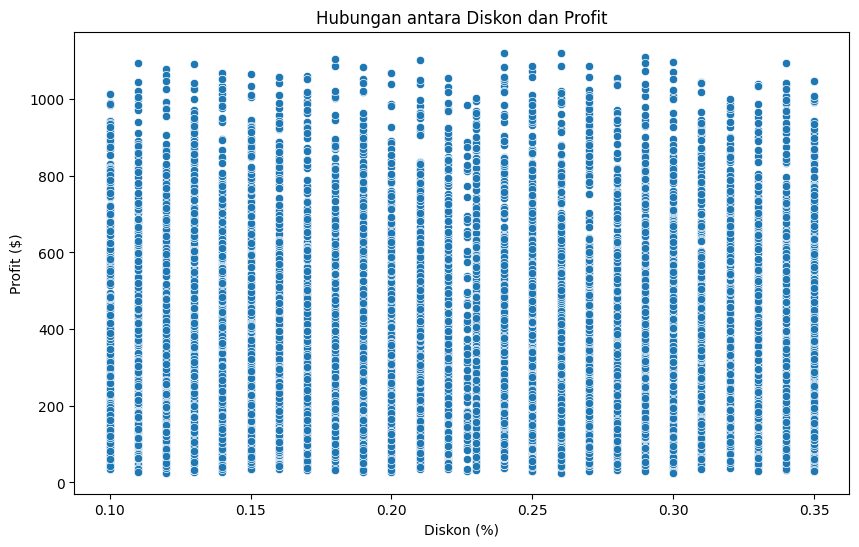

In [45]:
# Scatter plot antara Diskon dan Profit($)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit($)', data=df)
plt.title('Hubungan antara Diskon dan Profit')
plt.xlabel('Diskon (%)')
plt.ylabel('Profit ($)')
plt.show()


##5. Adakah pola tertentu dalam data Order Date yang menunjukkan musim atau bulan terbaik untuk meningkatkan penjualan atau profit?

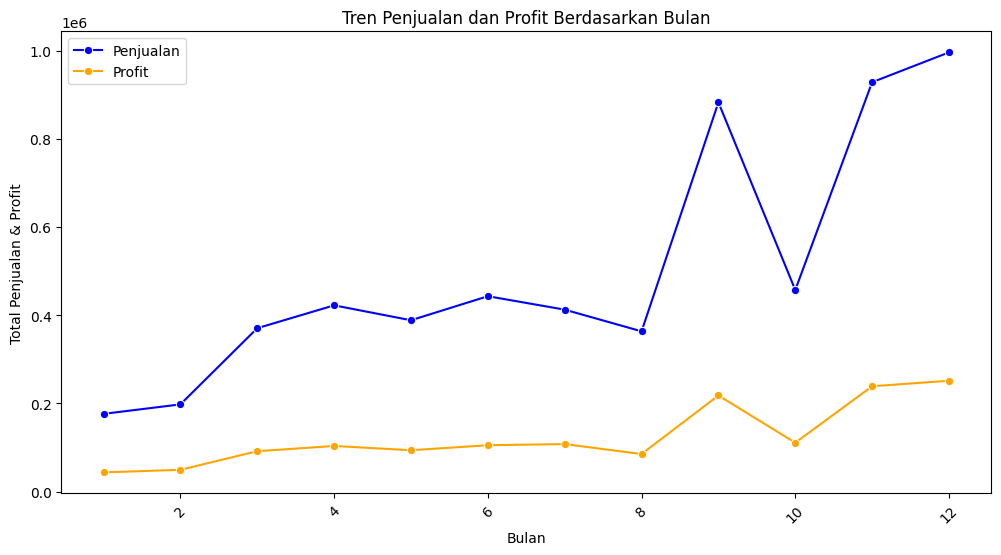

In [46]:
# Mengonversi 'Order Date' menjadi datetime jika belum dilakukan
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Menambahkan kolom Bulan dan Tahun untuk analisis tren
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Agregasi berdasarkan bulan untuk melihat tren penjualan dan profit
monthly_sales = df.groupby('Month')[['Sales', 'Profit($)']].sum().reset_index()

# Visualisasi tren penjualan dan profit berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', label='Penjualan', color='blue')
sns.lineplot(x='Month', y='Profit($)', data=monthly_sales, marker='o', label='Profit', color='orange')
plt.title('Tren Penjualan dan Profit Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan & Profit')
plt.legend()
plt.xticks(rotation=45)
plt.show()

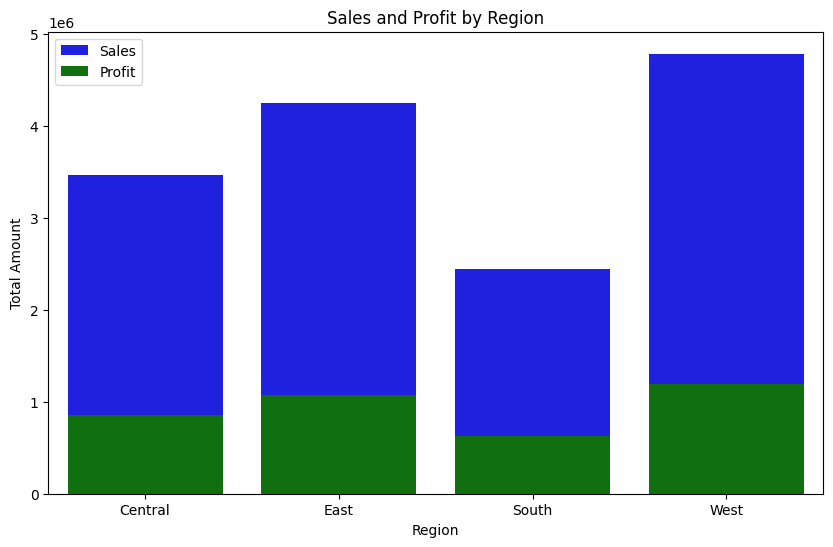

In [47]:
region_sales_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit($)': 'sum'}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_sales_profit, x='Region', y='Sales', color='b', label='Sales')
sns.barplot(data=region_sales_profit, x='Region', y='Profit($)', color='g', label='Profit')
plt.title('Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

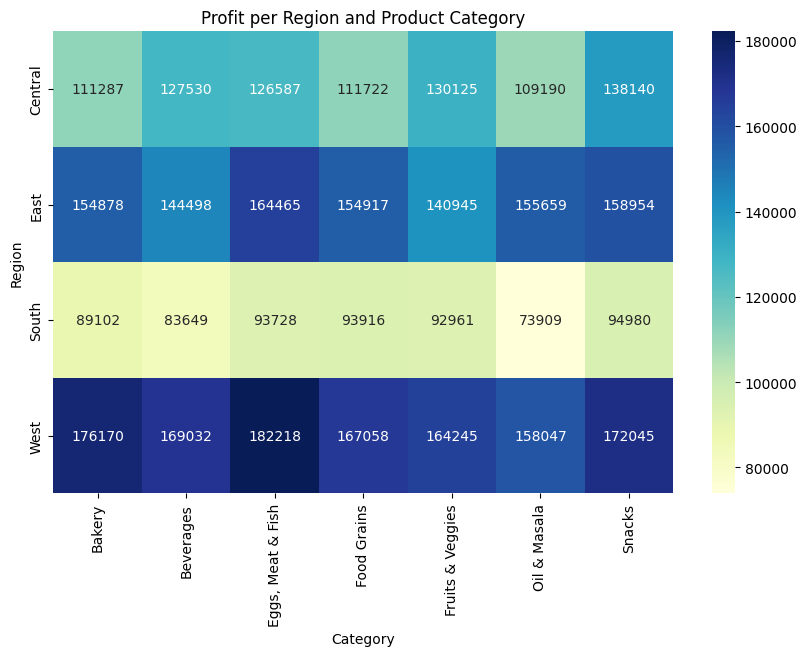

In [48]:
pivot_data = df.pivot_table(values='Profit($)', index='Region', columns='Category', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title("Profit per Region and Product Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()

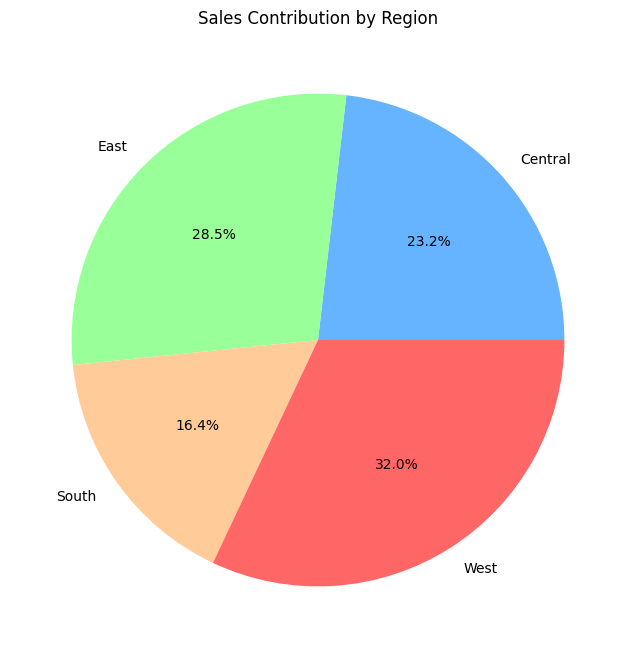

In [49]:
sales_by_region = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
sales_by_region.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])
plt.title("Sales Contribution by Region")
plt.ylabel("")
plt.show()

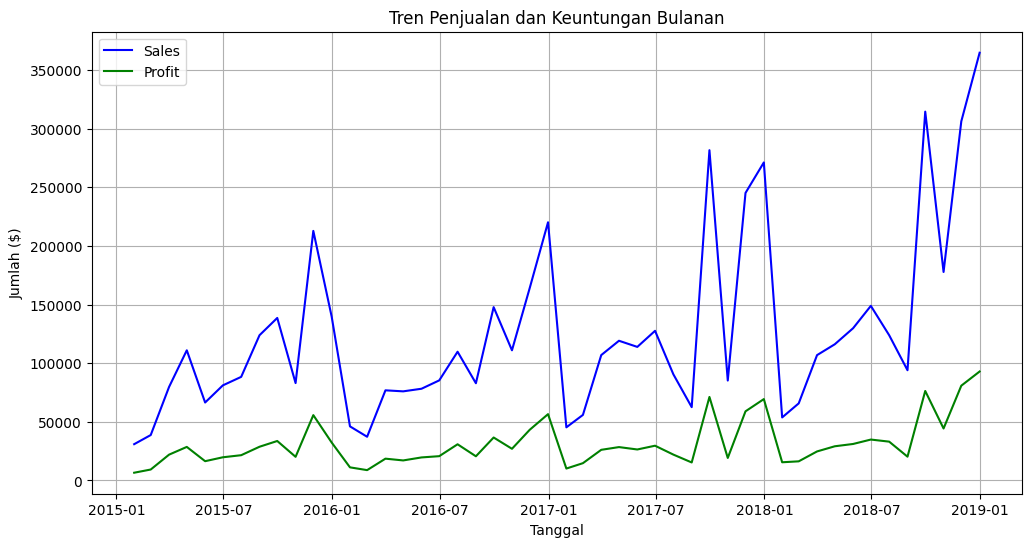

In [50]:
# Pastikan kolom 'Order Date' dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Set 'Order Date' sebagai indeks
monthly_data = df.set_index('Order Date').resample('M').agg({'Sales': 'sum', 'Profit($)': 'sum'}).reset_index()

# Membuat plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='Order Date', y='Sales', label='Sales', color='b')
sns.lineplot(data=monthly_data, x='Order Date', y='Profit($)', label='Profit', color='g')
plt.title("Tren Penjualan dan Keuntungan Bulanan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah ($)")
plt.legend()
plt.grid(True)
plt.show()


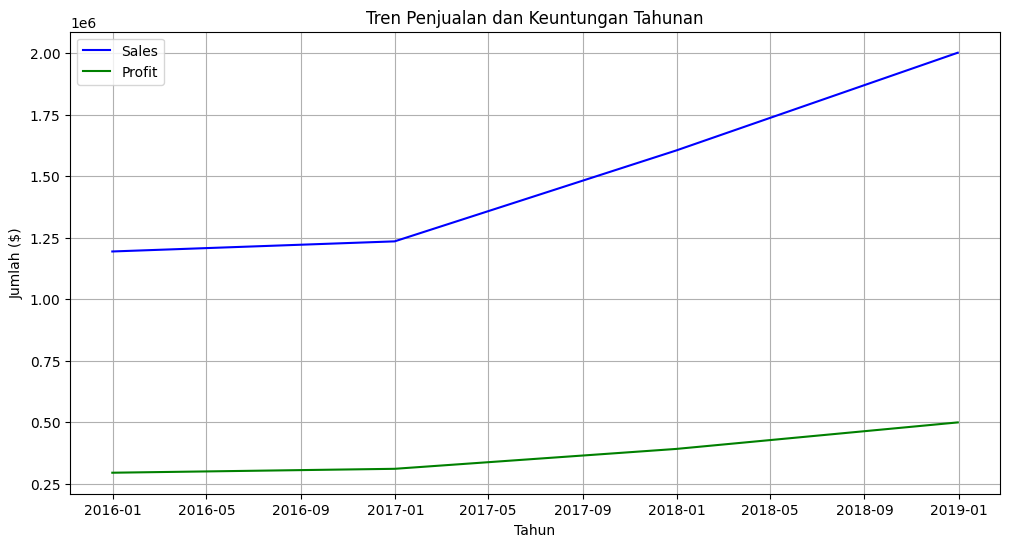

In [51]:
# Pastikan kolom 'Order Date' dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Menggunakan 'A' untuk resampling tahunan
yearly_data = df.set_index('Order Date').resample('Y').agg({'Sales': 'sum', 'Profit($)': 'sum'}).reset_index()

# Membuat plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='Order Date', y='Sales', label='Sales', color='b')
sns.lineplot(data=yearly_data, x='Order Date', y='Profit($)', label='Profit', color='g')
plt.title("Tren Penjualan dan Keuntungan Tahunan")
plt.xlabel("Tahun")
plt.ylabel("Jumlah ($)")
plt.legend()
plt.grid(True)
plt.show()


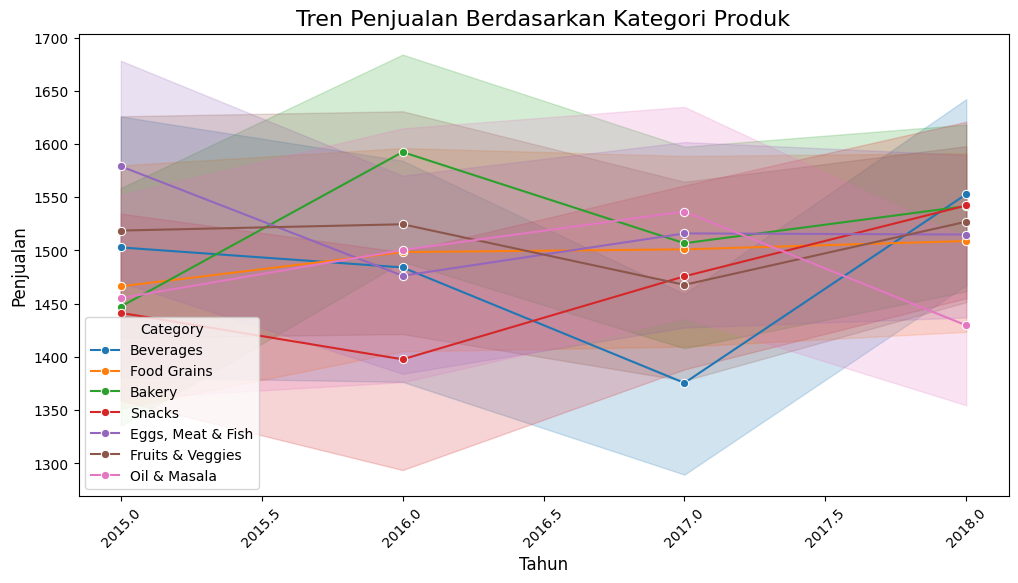

In [52]:
# Menambahkan kolom tahun dari Order Date untuk analisis tren
df['Year'] = df['Order Date'].dt.year

# Visualisasi tren penjualan berdasarkan kategori per tahun
plt.figure(figsize=(12, 6))

# Grafik line plot untuk melihat tren penjualan berdasarkan kategori
sns.lineplot(x='Year', y='Sales', hue='Category', data=df, marker='o', palette='tab10')
plt.title('Tren Penjualan Berdasarkan Kategori Produk', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Penjualan', fontsize=12)
plt.xticks(rotation=45)
plt.show()


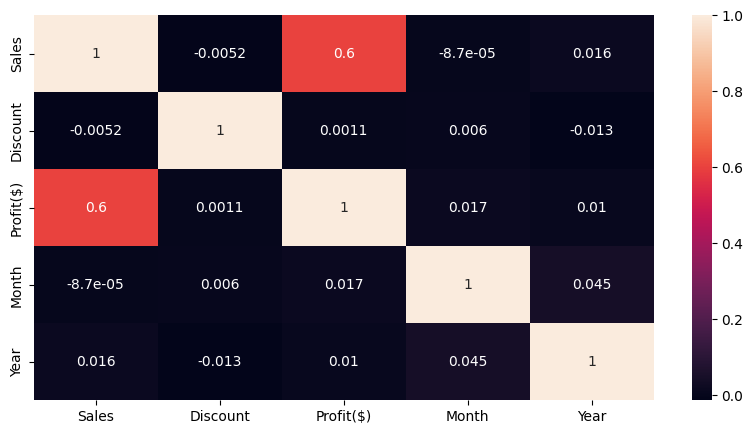

In [53]:
#check corelation with cofusion
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [54]:
df.describe()

,Order Date,Sales,Discount,Profit($),Month,Year
count,4031,9975.000000,9975.000000,9975.000000,4031.000000,4031.000000
mean,2017-04-28 12:15:10.940213504,1497.568506,0.226852,374.933081,8.023319,2016.724386
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000,1.000000,2015.000000
25%,2016-05-10 00:00:00,1006.000000,0.160000,180.360000,5.000000,2016.000000
50%,2017-07-01 00:00:00,1497.568506,0.230000,321.020000,9.000000,2017.000000
75%,2018-06-01 00:00:00,1990.000000,0.290000,525.390000,11.000000,2018.000000
max,2018-12-11 00:00:00,2500.000000,0.350000,1120.950000,12.000000,2018.000000
std,NaN,574.465505,0.074331,239.775799,3.269902,1.119508


In [55]:
df.head()

,Customer Name,Gender,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit($),State,Month,Year
Order ID,,,,,,,,,,,,,
OD2,Customer - OD2,Female,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749.0,0.226852,149.800000,Tamil Nadu,11.0,2017.0
OD5,Ridhesh,prefer not to say,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355.0,0.260000,374.933081,Tamil Nadu,10.0,2016.0
OD6,Adavan,Male,Food Grains,Rice,Dharmapuri,2015-06-09,West,2305.0,0.260000,322.700000,Tamil Nadu,6.0,2015.0
OD9,Customer - OD9,Male,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791.0,0.230000,181.930000,Tamil Nadu,6.0,2015.0
OD11,Ganesh,Male,Snacks,Chocolates,Karur,2015-06-09,West,1903.0,0.130000,437.690000,Tamil Nadu,6.0,2015.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9975 entries, OD2 to OD9991
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  9975 non-null   object        
 1   Gender         9975 non-null   object        
 2   Category       9975 non-null   object        
 3   Sub Category   9975 non-null   object        
 4   City           9975 non-null   object        
 5   Order Date     4031 non-null   datetime64[ns]
 6   Region         9975 non-null   object        
 7   Sales          9975 non-null   float64       
 8   Discount       9975 non-null   float64       
 9   Profit($)      9975 non-null   float64       
 10  State          9975 non-null   object        
 11  Month          4031 non-null   float64       
 12  Year           4031 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.3+ MB


Association Rule

In [57]:
df['Sub Category'].value_counts().sort_values(ascending=False)

Sub Category
Health Drinks         721
Soft Drinks           677
Cookies               516
Breads & Buns         506
Chocolates            498
Noodles               494
Masalas               459
Biscuits              456
Spices                450
Cakes                 449
Edible Oil & Ghee     448
Mutton                392
Fish                  375
Eggs                  374
Organic Staples       367
Fresh Fruits          365
Fresh Vegetables      352
Organic Fruits        352
Atta & Flour          350
Chicken               348
Organic Vegetables    344
Dals & Pulses         339
Rice                  338
Snacks                  5
Name: count, dtype: int64

In [58]:
# Import library
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Mengelompokkan data berdasarkan 'Order Date'
grouped_data = df.groupby('Order Date')['Sub Category'].apply(list)

# Pastikan tidak ada transaksi kosong
grouped_data = grouped_data[grouped_data.apply(len) > 0]

# Langkah 3: Konversi ke dalam format transaksi
te = TransactionEncoder()
te_data = te.fit_transform(grouped_data)
df_trans = pd.DataFrame(te_data, columns=te.columns_)

# Langkah 4: Menemukan itemset yang sering muncul (Frequent Itemsets)
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)

# Langkah 5: Mencari aturan asosiasi (Association Rules)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Menampilkan Frequent Itemsets dan Rules
print("Frequent Itemsets:")
frequent_itemsets



Frequent Itemsets:


,support,itemsets
0,0.244306,(Atta & Flour)
1,0.267081,(Biscuits)
2,0.335404,(Breads & Buns)
3,0.300207,(Cakes)
4,0.279503,(Chicken)
...,...,...
884,0.057971,"(Health Drinks, Edible Oil & Ghee, Spices, Sof..."
885,0.051760,"(Organic Fruits, Health Drinks, Eggs, Soft Dri..."
886,0.057971,"(Health Drinks, Mutton, Masalas, Soft Drinks)"
887,0.053830,"(Health Drinks, Spices, Masalas, Soft Drinks)"


In [59]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Atta & Flour),(Health Drinks),0.244306,0.389234,0.134576,0.550847,1.415209,0.039483,1.359819,0.388240
1,(Fresh Fruits),(Breads & Buns),0.258799,0.335404,0.130435,0.504000,1.502667,0.043633,1.339912,0.451317
2,(Breads & Buns),(Health Drinks),0.335404,0.389234,0.173913,0.518519,1.332151,0.043363,1.268514,0.375167
3,(Breads & Buns),(Soft Drinks),0.335404,0.389234,0.169772,0.506173,1.300433,0.039222,1.236801,0.347618
4,(Cakes),(Health Drinks),0.300207,0.389234,0.163561,0.544828,1.399743,0.046710,1.341834,0.408097
...,...,...,...,...,...,...,...,...,...,...
1086,"(Health Drinks, Spices, Mutton)",(Soft Drinks),0.074534,0.389234,0.053830,0.722222,1.855496,0.024819,2.198758,0.498193
1087,"(Health Drinks, Spices, Soft Drinks)",(Mutton),0.097308,0.256729,0.053830,0.553191,2.154770,0.028848,1.663512,0.593684
1088,"(Health Drinks, Mutton, Soft Drinks)",(Spices),0.093168,0.291925,0.053830,0.577778,1.979196,0.026632,1.677019,0.545574
1089,"(Spices, Mutton, Soft Drinks)",(Health Drinks),0.068323,0.389234,0.053830,0.787879,2.024178,0.027237,2.879326,0.543077


In [60]:
print("\n10 aturan asosiasi terbaik berdasarkan nilai leverage.:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift','leverage']].sort_values(by='leverage', ascending=False).head(10)


10 aturan asosiasi terbaik berdasarkan nilai leverage.:


,antecedents,consequents,support,confidence,lift,leverage
23,(Soft Drinks),(Health Drinks),0.200828,0.515957,1.325572,0.049325
22,(Health Drinks),(Soft Drinks),0.200828,0.515957,1.325572,0.049325
8,(Organic Fruits),(Cookies),0.122153,0.531532,1.667076,0.048879
246,"(Breads & Buns, Mutton)",(Cakes),0.082816,0.701754,2.337568,0.047388
4,(Cakes),(Health Drinks),0.163561,0.544828,1.399743,0.046710
12,(Edible Oil & Ghee),(Soft Drinks),0.159420,0.550000,1.413032,0.046599
941,"(Atta & Flour, Soft Drinks)","(Health Drinks, Fish)",0.062112,0.526316,3.972039,0.046475
247,"(Breads & Buns, Cakes)",(Mutton),0.082816,0.571429,2.225806,0.045609
95,"(Health Drinks, Fish)",(Atta & Flour),0.076605,0.578125,2.366393,0.044233
370,"(Breads & Buns, Soft Drinks)",(Health Drinks),0.109731,0.646341,1.660547,0.043650


### **Interpretasi Hasil**  
Hasil analisis menunjukkan bahwa produk seperti *Soft Drinks* dan *Health Drinks* memiliki hubungan kuat dengan nilai leverage tertinggi (0.049325), menunjukkan kecenderungan pelanggan untuk membeli kedua produk tersebut bersama-sama lebih sering daripada peluang acak. Hubungan signifikan lainnya terlihat pada produk seperti *Organic Fruits* dan *Cookies* (*leverage*: 0.048879) serta kombinasi *Breads & Buns, Mutton* dengan *Cakes* (*leverage*: 0.047388). Selain itu, aturan dengan *lift* tertinggi (3.972) pada kombinasi *Atta & Flour, Soft Drinks* dengan *Health Drinks, Fish* menunjukkan peluang besar untuk meningkatkan strategi pemasaran berbasis data.

---

### **Rekomendasi**
1. **Promosi Bundling**: Gabungkan produk dengan hubungan kuat, seperti *Soft Drinks* dan *Health Drinks*, dalam paket promosi untuk meningkatkan penjualan kedua produk.
2. **Penempatan Produk Strategis**: Tempatkan produk terkait dalam posisi berdekatan di rak atau dalam kategori yang sama di platform e-commerce.
3. **Peningkatan Cross-Selling**: Terapkan sistem rekomendasi berbasis data, misalnya, pelanggan yang membeli *Breads & Buns* disarankan untuk membeli *Cakes*.
4. **Manajemen Stok**: Pastikan stok produk dengan hubungan kuat seperti *Soft Drinks* dan *Health Drinks* mencukupi untuk memenuhi permintaan.
5. **Target Pemasaran Khusus**: Fokuskan promosi produk seperti *Edible Oil & Ghee* dan *Soft Drinks* ke segmen pasar tertentu yang memiliki pola pembelian serupa.
6. **Strategi untuk Produk Premium**: Manfaatkan kombinasi seperti *Atta & Flour, Soft Drinks* dengan *Health Drinks, Fish* untuk memasarkan produk premium dengan promosi eksklusif.

In [61]:
print("\n10 aturan asosiasi terbaik berdasarkan nilai support")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='support', ascending=False).head(10)


10 aturan asosiasi terbaik berdasarkan nilai support


,antecedents,consequents,support,confidence,lift
23,(Soft Drinks),(Health Drinks),0.200828,0.515957,1.325572
22,(Health Drinks),(Soft Drinks),0.200828,0.515957,1.325572
2,(Breads & Buns),(Health Drinks),0.173913,0.518519,1.332151
3,(Breads & Buns),(Soft Drinks),0.169772,0.506173,1.300433
6,(Chocolates),(Health Drinks),0.169772,0.512500,1.316689
17,(Masalas),(Health Drinks),0.163561,0.530201,1.362166
4,(Cakes),(Health Drinks),0.163561,0.544828,1.399743
7,(Cookies),(Health Drinks),0.163561,0.512987,1.317940
12,(Edible Oil & Ghee),(Soft Drinks),0.159420,0.550000,1.413032
24,(Spices),(Health Drinks),0.153209,0.524823,1.348348


### **Interpretasi Hasil**  
Analisis berdasarkan nilai *support* menunjukkan bahwa kombinasi *Soft Drinks* dan *Health Drinks* memiliki tingkat pembelian bersama tertinggi (0.200828), menunjukkan popularitas kedua produk tersebut secara keseluruhan di antara pelanggan. Selain itu, produk seperti *Breads & Buns* memiliki hubungan kuat dengan *Health Drinks* (*support*: 0.173913) dan *Soft Drinks* (*support*: 0.169772), menunjukkan permintaan tinggi untuk kombinasi ini. Produk lainnya seperti *Chocolates*, *Cakes*, dan *Masalas* juga memiliki dukungan tinggi dalam hubungannya dengan *Health Drinks*, yang menunjukkan bahwa pelanggan cenderung membeli produk-produk ini bersamaan.

---

### **Rekomendasi**  
1. **Peningkatan Promosi Produk Populer**: Fokuskan promosi pada kombinasi produk dengan *support* tinggi, seperti *Soft Drinks* dan *Health Drinks*, untuk mendorong pembelian lebih banyak.
2. **Optimalisasi Penempatan Produk**: Letakkan produk *Breads & Buns* bersama dengan *Health Drinks* dan *Soft Drinks* di rak toko atau halaman promosi online untuk memanfaatkan kecenderungan pembelian bersama.
3. **Program Loyalitas Pelanggan**: Tawarkan poin bonus atau diskon pada pelanggan yang membeli kombinasi seperti *Chocolates* dengan *Health Drinks* atau *Cakes* dengan *Health Drinks* untuk mendorong pengulangan pembelian.
4. **Segmentasi Kampanye Pemasaran**: Gunakan data ini untuk mengidentifikasi pola pembelian pelanggan tertentu dan buat kampanye pemasaran yang dipersonalisasi, misalnya untuk kombinasi *Masalas* dan *Health Drinks*.
5. **Penyesuaian Inventaris**: Pastikan produk-produk dengan nilai *support* tinggi seperti *Soft Drinks* dan *Health Drinks* tersedia dalam jumlah memadai untuk memenuhi permintaan pelanggan.
6. **Strategi Up-Selling dan Cross-Selling**: Rekomendasikan produk seperti *Edible Oil & Ghee* kepada pelanggan yang membeli *Soft Drinks* untuk mendorong pembelian tambahan.
7. **Diversifikasi Penawaran Produk**: Tawarkan variasi bundling yang melibatkan *Spices* dan *Health Drinks* untuk menarik pelanggan dengan preferensi spesifik.

In [62]:
print("\n10 aturan asosiasi terbaik berdasarkan nilai confidence")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False).head(10)


10 aturan asosiasi terbaik berdasarkan nilai confidence


,antecedents,consequents,support,confidence,lift
1053,"(Edible Oil & Ghee, Masalas, Dals & Pulses)",(Health Drinks),0.051760,0.892857,2.293883
939,"(Atta & Flour, Fish, Soft Drinks)",(Health Drinks),0.062112,0.882353,2.266896
932,"(Breads & Buns, Atta & Flour, Soft Drinks)",(Health Drinks),0.057971,0.875000,2.248005
943,"(Atta & Flour, Mutton, Soft Drinks)",(Health Drinks),0.053830,0.838710,2.154770
926,"(Breads & Buns, Atta & Flour, Mutton)",(Health Drinks),0.051760,0.833333,2.140957
1074,"(Organic Fruits, Eggs, Soft Drinks)",(Health Drinks),0.051760,0.833333,2.140957
1080,"(Mutton, Masalas, Soft Drinks)",(Health Drinks),0.057971,0.823529,2.115770
1016,"(Edible Oil & Ghee, Cakes, Soft Drinks)",(Health Drinks),0.053830,0.812500,2.087434
936,"(Health Drinks, Atta & Flour, Fish)",(Soft Drinks),0.062112,0.810811,2.083094
1051,"(Health Drinks, Edible Oil & Ghee, Dals & Pulses)",(Masalas),0.051760,0.806452,2.614202


In [63]:
print("\n10 aturan asosiasi terbaik berdasarkan nilai lift")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10)


10 aturan asosiasi terbaik berdasarkan nilai lift


,antecedents,consequents,support,confidence,lift
941,"(Atta & Flour, Soft Drinks)","(Health Drinks, Fish)",0.062112,0.526316,3.972039
1054,"(Edible Oil & Ghee, Dals & Pulses)","(Health Drinks, Masalas)",0.051760,0.568182,3.473820
970,"(Breads & Buns, Mutton)","(Health Drinks, Cakes)",0.060041,0.508772,3.110593
938,"(Health Drinks, Fish, Soft Drinks)",(Atta & Flour),0.062112,0.714286,2.923729
930,"(Atta & Flour, Mutton)","(Breads & Buns, Health Drinks)",0.051760,0.500000,2.875000
224,"(Biscuits, Rice)",(Organic Vegetables),0.051760,0.694444,2.818627
940,"(Atta & Flour, Fish)","(Health Drinks, Soft Drinks)",0.062112,0.566038,2.818518
1090,"(Spices, Mutton)","(Health Drinks, Soft Drinks)",0.053830,0.541667,2.697165
928,"(Breads & Buns, Health Drinks, Mutton)",(Atta & Flour),0.051760,0.657895,2.692908
1081,"(Mutton, Masalas)","(Health Drinks, Soft Drinks)",0.057971,0.538462,2.681205


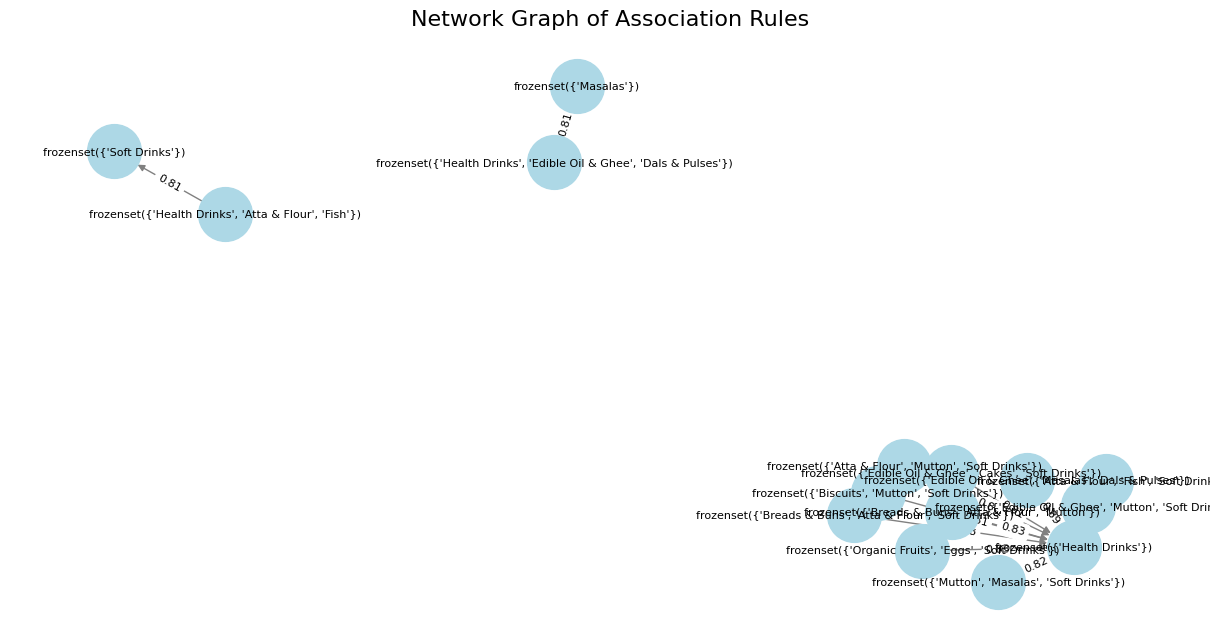

In [64]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Contoh data aturan asosiasi
# Pastikan Anda memiliki dataframe `rules` dengan kolom 'antecedents', 'consequents', dan 'confidence'

# Filter aturan asosiasi berdasarkan confidence > 0.8 (contoh)
filtered_rules = rules[rules['confidence'] > 0.8]

# Buat grafik berdasarkan aturan terfilter
G = nx.DiGraph()
for _, rule in filtered_rules.iterrows():
    G.add_edge(frozenset(rule['antecedents']), 
               frozenset(rule['consequents']), 
               weight=rule['confidence'])

# Layout grafik (gunakan spring layout untuk hasil lebih rapi)
pos = nx.spring_layout(G, k=0.3)

# Atur ukuran gambar
plt.figure(figsize=(12, 6))

# Gambar grafik dengan parameter tambahan
nx.draw(G, pos, with_labels=True, 
        node_size=1500, 
        node_color="lightblue", 
        font_size=8, 
        font_color="black", 
        edge_color="gray")

# Tambahkan label bobot pada edge (berdasarkan confidence)
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}  # Format confidence jadi 2 desimal
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Tambahkan judul
plt.title("Network Graph of Association Rules", fontsize=16)
plt.show()
